# Homework w07d01 - k-means clustering


We are going to use k-means clustering to assign class labels to the Wisconsin breast cancer dataset.

In [9]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets

#### 1. Load the breast cancer dataset into a dataframe

In [2]:
bc = datasets.load_breast_cancer()

In [3]:
df = pd.DataFrame(bc.data,columns=bc.feature_names)

#### 2. Apply a standard scaler to the dataset. Use kmeans clustering to divide the dataset into two clusters. 

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [5]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_

In [6]:
sum(labels)

375

#### 3. Check the labels obtained from the clustering against the true labels. Obtain the accuracy score, the classification report, the confusion matrix and the silhouette score. Keep in mind that the automatically assigned cluster labels might not be the same ones as in the target set.

In [7]:
predY = np.choose(labels, [0, 1]).astype(np.int64)
print 'Accuracy: ', metrics.accuracy_score(bc.target, predY)
print 'Classification Report: '
print metrics.classification_report(bc.target, predY)
print 'Confusion matrix: '
print metrics.confusion_matrix(bc.target, predY)
print 'Silhouette score: ', metrics.silhouette_score(bc.data, predY, metric='euclidean')

Accuracy:  0.905096660808
Classification Report: 
             precision    recall  f1-score   support

          0       0.91      0.83      0.87       212
          1       0.90      0.95      0.93       357

avg / total       0.91      0.91      0.90       569

Confusion matrix: 
[[176  36]
 [ 18 339]]
Silhouette score:  0.483353381376


#### 4. Produce two scatter plots for a pair of the dataset variables, one plot where points are coloured according to the class labels, another plot where points are coloured according to the clustering labels. (You can also include both scatter plots in a single one by choosing different symbols.) 

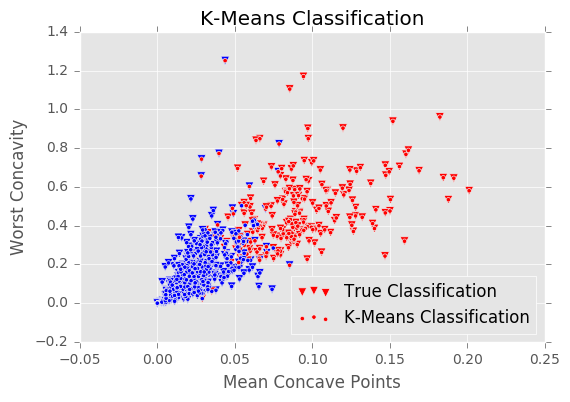

In [10]:
colormap = np.array(['red', 'blue'])
fig, ax = plt.subplots()

ax.scatter(df['mean concave points'],df['worst concavity'], 
           c=colormap[bc.target], 
            s=40, marker='v',label='True Classification')

ax.scatter(df['mean concave points'],df['worst concavity'], 
           c=colormap[predY], 
            s=10, marker='o',label='K-Means Classification')

plt.xlabel('Mean Concave Points')
plt.ylabel('Worst Concavity')
plt.title('K-Means Classification')
ax.legend(loc='lower right')
plt.show()